In [1]:
import warnings 
warnings.filterwarnings('ignore')

# basic libraries
import os
import numpy as np
import pandas as pd


#visulaization modules
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go

from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import (r2_score, 
                             mean_absolute_error, 
                             mean_squared_error
                        )


# model algorithams
from sklearn.ensemble import (RandomForestRegressor, 
                              AdaBoostRegressor, 
                              GradientBoostingRegressor)
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor


# Dataset link:
------> ** https://www.kaggle.com/datasets/nehalbirla/vehicle-dataset-from-cardekho/data?select=car+data.csv

In [2]:
df = pd.read_csv("car_price.csv")
df

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [3]:
df2 = df.copy()
df2

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [4]:
import datetime
date_time = datetime.datetime.now()
print(date_time)
df2['Age']=date_time.year - df2['Year']

2023-10-30 17:49:39.801444


In [5]:
df2.shape

(301, 10)

In [6]:
df2.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
Age              0
dtype: int64

In [7]:
df2 = df2.drop_duplicates()
df2 = df2.reset_index(drop=True)

In [8]:
df2.duplicated().sum()

0

In [9]:
df2

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,9
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,10
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,6
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,12
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,9
...,...,...,...,...,...,...,...,...,...,...
294,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0,7
295,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0,8
296,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0,14
297,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0,6


In [10]:
df2.dropna(inplace=True)  # This will remove rows with missing values


<a id = '2.0'> </a>

In [11]:
df2['Fuel_Type'] = df2['Fuel_Type'].map({'Petrol':2,'Diesel':1,'CNG':0})

In [12]:
df2['Seller_Type'] = df2['Seller_Type'].map({'Dealer':0,'Individual':1})

In [13]:
df2['Transmission'] = df2['Transmission'].map({'Manual':0,'Automatic':1})

In [14]:
df2.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000
mean,2013.615385,4.589632,7.541037,36916.752508,1.792642,0.354515,0.130435,0.043478,9.384615
std,2.896868,4.984240,8.567887,39015.170352,0.422297,0.479168,0.337346,0.248720,2.896868
min,2003.000000,0.100000,0.320000,500.000000,0.000000,0.000000,0.000000,0.000000,5.000000
25%,2012.000000,0.850000,1.200000,15000.000000,2.000000,0.000000,0.000000,0.000000,7.000000
50%,2014.000000,3.510000,6.100000,32000.000000,2.000000,0.000000,0.000000,0.000000,9.000000
75%,2016.000000,6.000000,9.840000,48883.500000,2.000000,1.000000,0.000000,0.000000,11.000000
max,2018.000000,35.000000,92.600000,500000.000000,2.000000,1.000000,1.000000,3.000000,20.000000


In [15]:
df2.Owner.value_counts()

Owner
0    288
1     10
3      1
Name: count, dtype: int64

<Axes: >

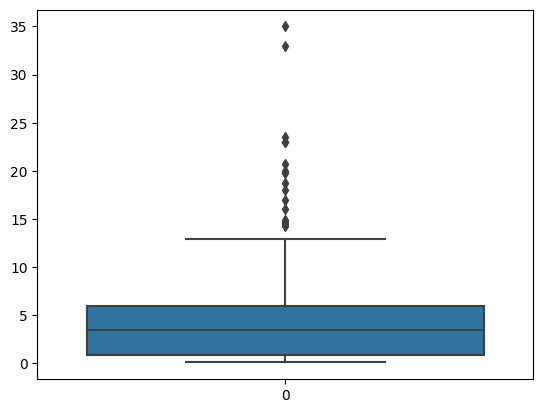

In [16]:
sns.boxplot(df2['Selling_Price'])

<Axes: >

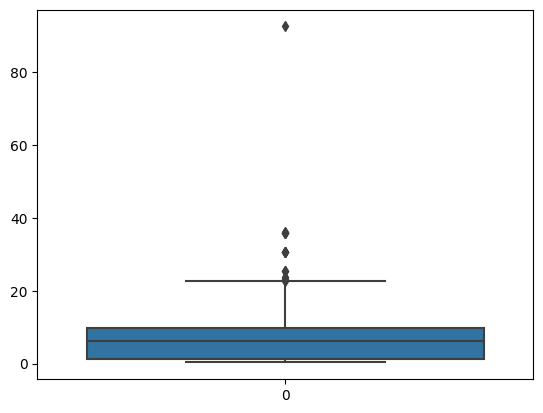

In [17]:
sns.boxplot(df2['Present_Price'])

In [18]:
# from feature_engine.outliers import Winsorizer

# win= Winsorizer(capping_method='iqr',variables=['Present_Price'],tail='both',fold=1.5)

# df2['Present_Price']=win.fit_transform(df2[['Present_Price']])

# print(win.left_tail_caps_,win.right_tail_caps_)

In [19]:
# from feature_engine.outliers import Winsorizer

# win= Winsorizer(capping_method='iqr',variables=['Selling_Price'],tail='both',fold=1.5)

# df2['Selling_Price']=win.fit_transform(df2[['Selling_Price']])

# print(win.left_tail_caps_,win.right_tail_caps_)

<a id='3.1'>

In [20]:
df2.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
Age              0
dtype: int64

In [16]:
df2.drop(["Car_Name",'Year'],axis=1,inplace=True)


In [17]:
df2= pd.read_csv('car_clean.csv')
# df2.to_csv('car_clean.csv',index =False)

In [18]:
X= df2.drop('Selling_Price',axis = 1)
y = df2['Selling_Price']

In [19]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=1,test_size=0.2)

In [20]:
X_train

,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age
161,0.95,27000,2,1,0,0,13
260,5.80,40023,2,0,0,0,8
218,4.43,38488,2,0,0,0,6
123,1.75,40000,2,1,0,0,14
39,7.87,24524,2,0,1,0,7
...,...,...,...,...,...,...,...
203,5.70,3493,2,0,0,1,7
255,13.60,40324,2,0,0,0,8
72,5.71,43000,2,0,0,0,12
235,13.60,68000,1,0,0,0,8


In [21]:
from sklearn.ensemble import GradientBoostingRegressor

gbc = GradientBoostingRegressor(random_state=42, learning_rate=0.1, n_estimators=256, subsample=0.75)
gbc.fit(X_train, y_train)

print('*'*10)

# prediction
train_prediction= gbc.predict(X_train)
test_prediction= gbc.predict(X_test)
print('*'*10)
# evaluation

from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score
print('R2 for train data', r2_score(y_train,train_prediction))
print('R2 for test data', r2_score(y_test,test_prediction))
print('*'*10)

print('RMSE for train data', np.sqrt(mean_squared_error(y_train,train_prediction)))
print('RMSE for test data', np.sqrt(mean_squared_error(y_test,test_prediction)))


print('*'*10)
print('*'*10)
print('MSE for train data:',(mean_squared_error(y_train, train_prediction)))
print('MSE for test data:',(mean_squared_error(y_test, test_prediction)))
print('*' * 10)


print('AMSE for train data:',(mean_absolute_error(y_train, train_prediction)))
print('AMSE for test data:',(mean_absolute_error(y_test, test_prediction)))
print('*' * 10)

gb = r2_score(y_test,test_prediction)


**********
**********
R2 for train data 0.9985868029373995
R2 for test data 0.9595668232971026
**********
RMSE for train data 0.13650564035863721
RMSE for test data 0.8140942363649922
**********
**********
MSE for train data: 0.018633789849721603
MSE for test data: 0.6627494256826998
**********
AMSE for train data: 0.10469250840239082
AMSE for test data: 0.43879568208734554
**********


In [22]:
from xgboost import XGBRegressor

Xgb = XGBRegressor(random_state=42)
Xgb.fit(X_train, y_train)

print('*'*10)

# prediction
train_prediction= Xgb.predict(X_train)
test_prediction= Xgb.predict(X_test)
print('*'*10)
# evaluation

from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score
print('R2 for train data', r2_score(y_train,train_prediction))
print('R2 for test data', r2_score(y_test,test_prediction))
print('*'*10)

print('RMSE for train data', np.sqrt(mean_squared_error(y_train,train_prediction)))
print('RMSE for test data', np.sqrt(mean_squared_error(y_test,test_prediction)))

print('*'*10)
print('MSE for train data:',(mean_squared_error(y_train, train_prediction)))
print('MSE for test data:',(mean_squared_error(y_test, test_prediction)))
print('*' * 10)


print('AMSE for train data:',(mean_absolute_error(y_train, train_prediction)))
print('AMSE for test data:',(mean_absolute_error(y_test, test_prediction)))
print('*' * 10)

xg = r2_score(y_test,test_prediction)


**********
**********
R2 for train data 0.9999975078675084
R2 for test data 0.9623284085151784
**********
RMSE for train data 0.005732377692693831
RMSE for test data 0.7858012803590949
**********
MSE for train data: 3.2860154011693854e-05
MSE for test data: 0.6174836522139928
**********
AMSE for train data: 0.0038666588092947677
AMSE for test data: 0.40409082476298014
**********


In [48]:
from sklearn.neighbors import KNeighborsRegressor

knr = KNeighborsRegressor( n_neighbors=7)
knr.fit(X_train, y_train)


print('*'*10)

# prediction
train_prediction= knr.predict(X_train)
test_prediction= knr.predict(X_test)
print('*'*10)
# evaluation

from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score
print('R2 for train data', r2_score(y_train,train_prediction))
print('R2 for test data', r2_score(y_test,test_prediction))
print('*'*10)

print('RMSE for train data', np.sqrt(mean_squared_error(y_train,train_prediction)))
print('RMSE for test data', np.sqrt(mean_squared_error(y_test,test_prediction)))

print('*'*10)

print('MSE for train data:',(mean_squared_error(y_train, train_prediction)))
print('MSE for test data:',(mean_squared_error(y_test, test_prediction)))
print('*' * 10)


print('AMSE for train data:',(mean_absolute_error(y_train, train_prediction)))
print('AMSE for test data:',(mean_absolute_error(y_test, test_prediction)))
print('*' * 10)

knn = r2_score(y_test,test_prediction)


**********
**********
R2 for train data 0.14612941682958203
R2 for test data 0.11406002841397045
**********
RMSE for train data 3.355407411887917
RMSE for test data 3.8107275203947446
**********
MSE for train data: 11.25875889975237
MSE for test data: 14.521644234693877
**********
AMSE for train data: 2.6486820083682012
AMSE for test data: 3.081928571428571
**********


In [42]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor(random_state=42, max_depth=7, n_estimators=128)
rfr.fit(X_train, y_train)


print('*'*10)

# prediction
train_prediction= rfr.predict(X_train)
test_prediction= rfr.predict(X_test)
print('*'*10)
# evaluation

from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score
print('R2 for train data', r2_score(y_train,train_prediction))
print('R2 for test data', r2_score(y_test,test_prediction))
print('*'*10)

print('RMSE for train data', np.sqrt(mean_squared_error(y_train,train_prediction)))
print('RMSE for test data', np.sqrt(mean_squared_error(y_test,test_prediction)))

print('*'*10)
print('MSE for train data:',(mean_squared_error(y_train, train_prediction)))
print('MSE for test data:',(mean_squared_error(y_test, test_prediction)))
print('*' * 10)


print('AMSE for train data:',(mean_absolute_error(y_train, train_prediction)))
print('AMSE for test data:',(mean_absolute_error(y_test, test_prediction)))
print('*' * 10)
rf = r2_score(y_test,test_prediction)


**********
**********
R2 for train data 0.9891493535052959
R2 for test data 0.9534179958944364
**********
RMSE for train data 0.3782483489128403
RMSE for test data 0.8738056183873818
**********
MSE for train data: 0.1430718134552898
MSE for test data: 0.7635362587253547
**********
AMSE for train data: 0.25142734392463817
AMSE for test data: 0.4367029304264903
**********


In [43]:
from sklearn.ensemble import AdaBoostRegressor

ada = AdaBoostRegressor(random_state=42)
ada.fit(X_train, y_train)


print('*'*10)

# prediction
train_prediction= ada.predict(X_train)
test_prediction= ada.predict(X_test)
print('*'*10)
# evaluation

from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score
print('R2 for train data', r2_score(y_train,train_prediction))
print('R2 for test data', r2_score(y_test,test_prediction))
print('*'*10)

print('RMSE for train data', np.sqrt(mean_squared_error(y_train,train_prediction)))
print('RMSE for test data', np.sqrt(mean_squared_error(y_test,test_prediction)))

print('*'*10)
print('MSE for train data:',(mean_squared_error(y_train, train_prediction)))
print('MSE for test data:',(mean_squared_error(y_test, test_prediction)))
print('*' * 10)


print('AMSE for train data:',(mean_absolute_error(y_train, train_prediction)))
print('AMSE for test data:',(mean_absolute_error(y_test, test_prediction)))
print('*' * 10)
ad = r2_score(y_test,test_prediction)


**********
**********
R2 for train data 0.9615843513801002
R2 for test data 0.9468532902530841
**********
RMSE for train data 0.7117104109370671
RMSE for test data 0.9333487273664277
**********
MSE for train data: 0.5065317090362089
MSE for test data: 0.8711398468765302
**********
AMSE for train data: 0.5801524728700868
AMSE for test data: 0.5926990896867679
**********


In [44]:
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor(random_state=42, max_depth= 7)
dt.fit(X_train, y_train)

print('*'*10)

# prediction
train_prediction= dt.predict(X_train)
test_prediction= dt.predict(X_test)
print('*'*10)
# evaluation

from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score
print('R2 for train data', r2_score(y_train,train_prediction))
print('R2 for test data', r2_score(y_test,test_prediction))
print('*'*10)

print('RMSE for train data', np.sqrt(mean_squared_error(y_train,train_prediction)))
print('RMSE for test data', np.sqrt(mean_squared_error(y_test,test_prediction)))

print('*'*10)
print('MSE for train data:',(mean_squared_error(y_train, train_prediction)))
print('MSE for test data:',(mean_squared_error(y_test, test_prediction)))
print('*' * 10)


print('AMSE for train data:',(mean_absolute_error(y_train, train_prediction)))
print('AMSE for test data:',(mean_absolute_error(y_test, test_prediction)))
print('*' * 10)
Dtr = r2_score(y_test,test_prediction)


**********
**********
R2 for train data 0.9923080162474278
R2 for test data 0.9688756019114633
**********
RMSE for train data 0.3184699155373148
RMSE for test data 0.7142598345614807
**********
MSE for train data: 0.1014230871023444
MSE for test data: 0.5101671112677938
**********
AMSE for train data: 0.17112605432689118
AMSE for test data: 0.40761858465608464
**********


In [45]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)

print('*'*10)

# prediction
train_prediction= lr.predict(X_train)
test_prediction= lr.predict(X_test)
print('*'*10)
# evaluation

from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score
print('R2 for train data', r2_score(y_train,train_prediction))
print('R2 for test data',r2_score(y_test,test_prediction))
print('*'*10)

print('RMSE for train data', np.sqrt(mean_squared_error(y_train,train_prediction)))
print('RMSE for test data', np.sqrt(mean_squared_error(y_test,test_prediction)))

print('*'*10)
print('MSE for train data:',(mean_squared_error(y_train, train_prediction)))
print('MSE for test data:',(mean_squared_error(y_test, test_prediction)))
print('*' * 10)


print('AMSE for train data:',(mean_absolute_error(y_train, train_prediction)))
print('AMSE for test data:',(mean_absolute_error(y_test, test_prediction)))
print('*' * 10)

lrr = r2_score(y_test,test_prediction)


**********
**********
R2 for train data 0.8614487053656322
R2 for test data 0.9259303586889642
**********
RMSE for train data 1.351619745639185
RMSE for test data 1.1018586082140778
**********
MSE for train data: 1.826875936801735
MSE for test data: 1.2140923924954643
**********
AMSE for train data: 1.0090094027496541
AMSE for test data: 0.914980338556227
**********


In [47]:
score = [Dtr,rf,lrr,knn,xg,gb]
Models = pd.DataFrame({
    'Model': ["Decision Tree","Random Forest", "Linear Regression",'Knn','XGBoost',"GradientBoosting"],
    'Score': score})
Models.sort_values(by='Score', ascending=False)

,Model,Score
0,Decision Tree,0.968876
4,XGBoost,0.962328
5,GradientBoosting,0.959567
1,Random Forest,0.953418
2,Linear Regression,0.925930
3,Knn,0.114060


In [49]:
from sklearn.neighbors import KNeighborsRegressor

knr = KNeighborsRegressor( n_neighbors=7)
knr.fit(X_train, y_train)


print('*'*10)

# prediction
train_prediction= knr.predict(X_train)
test_prediction= knr.predict(X_test)
print('*'*10)
# evaluation

from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score
print('R2 for train data', r2_score(y_train,train_prediction))
print('R2 for test data', r2_score(y_test,test_prediction))
print('*'*10)

print('RMSE for train data', np.sqrt(mean_squared_error(y_train,train_prediction)))
print('RMSE for test data', np.sqrt(mean_squared_error(y_test,test_prediction)))

print('*'*10)

print('MSE for train data:',(mean_squared_error(y_train, train_prediction)))
print('MSE for test data:',(mean_squared_error(y_test, test_prediction)))
print('*' * 10)


print('AMSE for train data:',(mean_absolute_error(y_train, train_prediction)))
print('AMSE for test data:',(mean_absolute_error(y_test, test_prediction)))
print('*' * 10)

knn = r2_score(y_test,test_prediction)


**********
**********
R2 for train data 0.14612941682958203
R2 for test data 0.11406002841397045
**********
RMSE for train data 3.355407411887917
RMSE for test data 3.8107275203947446
**********
MSE for train data: 11.25875889975237
MSE for test data: 14.521644234693877
**********
AMSE for train data: 2.6486820083682012
AMSE for test data: 3.081928571428571
**********


In [24]:
data = {'Actual': y_test, 'Predicted': test_prediction}
df1 = pd.DataFrame(data)
df1

,Actual,Predicted
173,0.380,0.200858
287,10.110,11.221742
51,13.725,13.736048
146,0.520,0.387464
214,2.900,3.088506
197,0.120,0.126824
274,8.650,8.657840
62,13.725,13.752309
27,1.950,2.530082
201,2.950,2.707556


In [25]:
X_test

,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age
173,0.787,75000,2,1,0,0,12
287,13.600,10980,2,0,0,0,7
51,19.770,15000,1,0,1,0,6
146,0.940,45000,2,1,0,0,13
214,4.430,12500,2,0,0,0,7
197,0.580,53000,2,1,0,0,16
274,13.600,24800,2,0,0,0,8
62,22.800,47000,1,0,1,0,8
27,3.950,44542,2,0,0,0,13
201,4.600,53460,2,0,0,0,12


In [26]:
df2

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age
0,3.35,5.59,27000,2,0,0,0,9
1,4.75,9.54,43000,1,0,0,0,10
2,7.25,9.85,6900,2,0,0,0,6
3,2.85,4.15,5200,2,0,0,0,12
4,4.60,6.87,42450,1,0,0,0,9
...,...,...,...,...,...,...,...,...
294,9.50,11.60,33988,1,0,0,0,7
295,4.00,5.90,60000,2,0,0,0,8
296,3.35,11.00,87934,2,0,0,0,14
297,11.50,12.50,9000,1,0,0,0,6


In [34]:
import pickle
#save the model
model = rfr  # Your machine learning model object
file_path = 'Xgb_car.pkl'  # Path to the file where you want to save the model

with open(file_path, 'wb') as file:
    pickle.dump(model, file)


In [30]:
# load the model
import pickle

file_path = 'Xgb_car.pkl'  # Path to the saved model file

with open(file_path, 'rb') as file:
    loaded_model = pickle.load(file)

In [28]:
df2

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age
0,3.35,5.59,27000,2,0,0,0,9
1,4.75,9.54,43000,1,0,0,0,10
2,7.25,9.85,6900,2,0,0,0,6
3,2.85,4.15,5200,2,0,0,0,12
4,4.60,6.87,42450,1,0,0,0,9
...,...,...,...,...,...,...,...,...
294,9.50,11.60,33988,1,0,0,0,7
295,4.00,5.90,60000,2,0,0,0,8
296,3.35,11.00,87934,2,0,0,0,14
297,11.50,12.50,9000,1,0,0,0,6


In [37]:
knr.predict([[5.59,27000,2,0,0,0,9]])

array([3.50714286])

In [54]:
    
    X= df2.drop('Selling_Price',axis = 1)
    y = df2['Selling_Price']
    from sklearn.preprocessing import StandardScaler
    
    scaler = StandardScaler()
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

    print("ddddddddddddddddddd",X_train.shape)

    knn = KNeighborsRegressor()
    knn.fit(X_train, y_train)

    print('*'*10)

    # prediction
    train_prediction= knn.predict(X_train)
    test_prediction= knn.predict(X_test)
    print('*'*10)
    # evaluation

    from sklearn.metrics import accuracy_score
    from sklearn.metrics import r2_score
    print('R2 for train data', r2_score(y_train,train_prediction))
    print('R2 for test data', r2_score(y_test,test_prediction))
    print('*'*10)

    print('RMSE for train data', np.sqrt(mean_squared_error(y_train,train_prediction)))
    print('RMSE for test data', np.sqrt(mean_squared_error(y_test,test_prediction)))

    print('*'*10)
    print('MSE for train data:',(mean_squared_error(y_train, train_prediction)))
    print('MSE for test data:',(mean_squared_error(y_test, test_prediction)))
    print('*' * 10)


ddddddddddddddddddd (239, 7)
**********
**********
R2 for train data 0.23479150610175958
R2 for test data 0.07897375897395187
**********
RMSE for train data 3.176428797213262
RMSE for test data 3.8854538066142714
**********
MSE for train data: 10.089699903765691
MSE for test data: 15.096751283333331
**********


In [53]:
X_train

,Car_Name,Year,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
102,KTM RC200,2017,1.78,4000,Petrol,Individual,Manual,0
80,corolla altis,2016,14.89,23000,Diesel,Dealer,Manual,0
245,verna,2012,9.40,71000,Diesel,Dealer,Manual,0
163,Bajaj Avenger 220 dtsi,2010,0.95,27000,Petrol,Individual,Manual,0
131,Yamaha FZ 16,2015,0.82,18000,Petrol,Individual,Manual,0
...,...,...,...,...,...,...,...,...
203,i10,2011,4.60,53460,Petrol,Dealer,Manual,0
255,brio,2012,5.35,53675,Petrol,Dealer,Manual,0
72,corolla altis,2013,18.61,56001,Petrol,Dealer,Manual,0
235,verna,2017,9.40,15141,Petrol,Dealer,Manual,0


In [38]:
knr.predict([[9.85,6900,2,0,0,0,6]])

array([4.19642857])

In [39]:
knr.predict([[11.60,33988,1,0,0,0,7]])


array([5.54285714])

In [41]:
knr.predict([[3.76,10079,	2,	0,	0	,0,10]])

array([6.08785714])

In [39]:
from xgboost import XGBRegressor

Xgb = XGBRegressor(random_state=42)
Xgb.fit(X_train, y_train)

print('*'*10)

# prediction
train_prediction= Xgb.predict(X_train)
test_prediction= Xgb.predict(X_test)
print('*'*10)
# evaluation

from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score
print('R2 for train data', r2_score(y_train,train_prediction))
print('R2 for test data', r2_score(y_test,test_prediction))
print('*'*10)

print('RMSE for train data', np.sqrt(mean_squared_error(y_train,train_prediction)))
print('RMSE for test data', np.sqrt(mean_squared_error(y_test,test_prediction)))

print('*'*10)
print('MSE for train data:',(mean_squared_error(y_train, train_prediction)))
print('MSE for test data:',(mean_squared_error(y_test, test_prediction)))
print('*' * 10)


print('AMSE for train data:',(mean_absolute_error(y_train, train_prediction)))
print('AMSE for test data:',(mean_absolute_error(y_test, test_prediction)))
print('*' * 10)

xg = r2_score(y_test,test_prediction)


**********
**********
R2 for train data 0.9999955026796874
R2 for test data 0.9661489875050014
**********
RMSE for train data 0.009716188297370396
RMSE for test data 1.1601104129838922
**********
MSE for train data: 9.440431502995744e-05
MSE for test data: 1.3458561703136567
**********
AMSE for train data: 0.006198377748912355
AMSE for test data: 0.5525272977848846
**********


In [40]:
compare = pd.DataFrame({'Actual': y_test.values, 'Predict': test_prediction})

compare

,Actual,Predict
0,0.38,0.175117
1,10.11,10.734238
2,18.00,17.582716
3,0.52,0.432420
4,2.90,3.075108
5,0.12,0.135241
6,8.65,8.504972
7,23.50,20.097895
8,1.95,2.410687
9,2.95,2.474407


In [57]:
df2

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age
0,ritz,2014,3.35,5.59,27000,2,0,0,0,9
1,sx4,2013,4.75,9.54,43000,1,0,0,0,10
2,ciaz,2017,7.25,9.85,6900,2,0,0,0,6
3,wagon r,2011,2.85,4.15,5200,2,0,0,0,12
4,swift,2014,4.60,6.87,42450,1,0,0,0,9
...,...,...,...,...,...,...,...,...,...,...
294,city,2016,9.50,11.60,33988,1,0,0,0,7
295,brio,2015,4.00,5.90,60000,2,0,0,0,8
296,city,2009,3.35,11.00,87934,2,0,0,0,14
297,city,2017,11.50,12.50,9000,1,0,0,0,6


<a id = '5'></a>

<a id = '5.1'>
    

<a id = '5.3'>